# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import geoviews as gv
gv.extension('bokeh')

import holoviews as hv  # Ensure holoviews is imported
from holoviews import opts, dim


# Import API key
from api_keys import geoapify_key
from api_keys import weather_api_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,ushuaia,-54.8000,-68.3000,12.81,58,40,1.03,AR,1738791637
1,1,margate,51.3813,1.3862,5.94,89,100,0.45,GB,1738791663
2,2,saint-philippe,-21.3585,55.7679,27.65,81,30,4.31,RE,1738791664
3,3,keflavik,64.0049,-22.5624,6.24,70,100,21.61,IS,1738791665
4,4,port-aux-francais,-49.3500,70.2167,7.32,95,99,9.41,TF,1738791667


In [3]:
#hotel_df = city_data_df[["City", "Lat", "Lng", "Humidity", "Country"]].copy()

# Add a column for hotel names (this will be filled using the Geoapify API)
#hotel_df["Hotel Name"] = ""

---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
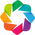

:Points   [Lng,Lat]   (Humidity)

In [4]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE
city_data_df.rename(columns={"Lat": "Latitude", "Lng": "Longitude"}, inplace=True)
print(city_data_df.dtypes)
city_data_df = city_data_df.astype({"Latitude": float, "Longitude": float, "Humidity": float})
city_data_df.dropna(subset=["Latitude", "Longitude", "Humidity"], inplace=True)
# Enable Bokeh extension for visualization
hv.extension('bokeh')


  # Load city weather data
file_path = "output_data/cities.csv"  # Ensure the correct path to the CSV
city_data_df = pd.read_csv(file_path)

# Ensure correct data types
city_data_df = city_data_df.astype({"Lat": float, "Lng": float, "Humidity": float})

# Create an interactive city map where humidity determines the point size
humidity_map = gv.Points(
    city_data_df,
    kdims=["Lng", "Lat"],  # Longitude (X-axis) and Latitude (Y-axis)
    vdims=["Humidity"]  # Use Humidity to color and scale points
)

# Customize visualization properties
humidity_map = humidity_map.opts(
    title="City Humidity Map",
    color="Humidity",  # Color points based on humidity levels
    cmap="coolwarm",  # Blue for low humidity, Red for high humidity
    size=dim("Humidity") * 0.1,  # Dynamically scale point size based on humidity
    tools=["hover"],  # Enable hover tool for city details
    width=900, height=500
)

# Display the final interactive map
humidity_map




  

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [5]:


# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE
# Load the city weather data

# **Step 1: Filter Cities Based on Ideal Criteria & Create a Copy**
ideal_cities = city_data_df[
    (city_data_df["Max Temp"] > 21) & (city_data_df["Max Temp"] < 27) &
    (city_data_df["Wind Speed"] < 4.5) &
    (city_data_df["Cloudiness"] == 0)
].copy()  # **This ensures we're working with a copy, not a slice**

#  Drop Any Rows with Null Values**
ideal_cities.dropna(inplace=True)  # Now it's safe to modify

#  Display Sample Data**
print(ideal_cities[["City_ID", "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]])

#  Save the filtered data**
ideal_cities.to_csv("output_data/ideal_cities.csv", index=False)

     City_ID            City      Lat       Lng  Max Temp  Humidity  \
246      246  cabo san lucas  22.8909 -109.9124     26.17      36.0   
309      309          darwin -12.4611  130.8418     24.99     100.0   
320      320   selebi-phikwe -21.9790   27.8498     25.17      41.0   
408      408       st. marys  30.7305  -81.5465     26.14      67.0   
449      449         xai-xai -25.0519   33.6442     24.45      79.0   
486      486        ak'ordat  15.5486   37.8867     24.70      52.0   
525      525      muddebihal  16.3333   76.1333     21.55      43.0   

     Cloudiness  Wind Speed Country        Date  
246           0        3.09      MX  1738791670  
309           0        1.54      AU  1738792049  
320           0        2.42      BW  1738792063  
408           0        3.09      US  1738792170  
449           0        4.37      MZ  1738792218  
486           0        3.11      ER  1738792261  
525           0        3.71      IN  1738792308  


### Step 3: Create a new DataFrame called `hotel_df`.

In [ ]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE
  
hotel_df = ideal_cities[["City", "Country", "Lat", "Lng", "Humidity"]].copy()
# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE

hotel_df["Hotel Name"] = ""

# Display sample data
print("Sample Hotel Data (Before API Call):")
print(hotel_df.head())


#  Save for Future Use**
hotel_df.to_csv("output_data/hotel_data.csv", index=False)
# Load the CSV file created in Part 1 into a Pandas DataFrame





Sample Hotel Data (Before API Call):
               City Country      Lat       Lng  Humidity Hotel Name
246  cabo san lucas      MX  22.8909 -109.9124      36.0           
309          darwin      AU -12.4611  130.8418     100.0           
320   selebi-phikwe      BW -21.9790   27.8498      41.0           
408       st. marys      US  30.7305  -81.5465      67.0           
449         xai-xai      MZ -25.0519   33.6442      79.0           


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [7]:
# Set parameters to search for a hotel
radius = 10000
params = {
    "categories": "accommodation.hotel",  # Look for hotels
    "limit": 1,  # Get only the first result
    "apiKey": geoapify_key  # Your API key
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE
     # Get latitude and longitude from the DataFrame
    lat, lon = row["Lat"], row["Lng"]


    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{lon},{lat},{radius}"  # Define search area
    params["bias"] = f"proximity:{lon},{lat}"  # Prioritize closer locations


    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    response = requests.get(base_url, params=params)
    response.raise_for_status()  # Raise an error for bad responses
    

# Convert the API response to JSON format
    #name_address = # YOUR CODE HERE
    name_address = response.json()

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
cabo san lucas - nearest hotel: Comfort Rooms
darwin - nearest hotel: Mantra Pantanas Darwin
selebi-phikwe - nearest hotel: Cresta Bosele Hotel
st. marys - nearest hotel: Cumberland Kingsbay Lodge
xai-xai - nearest hotel: No hotel found
ak'ordat - nearest hotel: Omal Hotel
muddebihal - nearest hotel: No hotel found


,City,Country,Lat,Lng,Humidity,Hotel Name
246,cabo san lucas,MX,22.8909,-109.9124,36.0,Comfort Rooms
309,darwin,AU,-12.4611,130.8418,100.0,Mantra Pantanas Darwin
320,selebi-phikwe,BW,-21.9790,27.8498,41.0,Cresta Bosele Hotel
408,st. marys,US,30.7305,-81.5465,67.0,Cumberland Kingsbay Lodge
449,xai-xai,MZ,-25.0519,33.6442,79.0,No hotel found
486,ak'ordat,ER,15.5486,37.8867,52.0,Omal Hotel
525,muddebihal,IN,16.3333,76.1333,43.0,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [ ]:
%%capture --no-display

# Configure the map plot

# YOUR CODE HERE
# Load the updated hotel DataFrame (Ensure the correct file path)

vacation_map = gv.Points(
    hotel_df,  # Use the existing DataFrame
    kdims=["Lng", "Lat"],  # Longitude (X-axis) and Latitude (Y-axis)
    vdims=["City", "Hotel Name", "Country", "Humidity"]  # Add hotel & country to hover info
)

# **Step 2: Configure the Hover Tooltip**
vacation_map = vacation_map.opts(
    title="Vacation Destination Map with Hotels",
    color="Humidity",  # Color points based on humidity levels
    cmap="coolwarm",  # Blue for low humidity, Red for high humidity
    size=dim("Humidity") * 0.1,  # Dynamically scale point size based on humidity
    tools=["hover"],  # Enable hover tool to display city, hotel, country
    width=900, height=500
)

# Display the map
vacation_map







:Points   [Lng,Lat]   (City,Hotel Name,Country,Humidity)